In [ ]:
library(repr)
options(repr.plot.width=20, repr.plot.height=10)

In [ ]:
flipud <- function(x) {
    return(abs(max(x)-x))
}

In [ ]:
plot.ppg <- function(x, plot.inverted=FALSE, color="blue", main="PPG signal") {
    t <- 1:length(x)
    if (!plot.inverted) {
        x = flipud(x)
    }
    plot(t, x, col = color, type = "l",
         xlab = "t", ylab='x', main=main)
}

In [ ]:
get.measurement <- function(df, mid) {
    # e.g.: m <- get.measurement(df, 35)
    measurement  <- df[mid, ]
    x <- as.numeric(as.vector(measurement[7:606])) # extract signal
    x[is.na(x)]  <- mean(x, na.rm = TRUE) # replace NA's with mean value (at the end of iphone measurements)
    
    return(list("id" = measurement$id,
         "date" = measurement$date,
         "device" = measurement$device,
         "sys" = measurement$sys,
         "dia" = measurement$dia,
         "hr" = measurement$hr,
         "x" = x))
}

In [ ]:
plot.measurement  <- function(df, mid) {
    # e.g.: plot.measurement(df, 35)
    m <- get.measurement(df, mid)
    plot.ppg(m$x, 
             main=paste('PPG signal of', 
                        ' MID: ', mid,
                        ', PID: ', m$id,
                        ', date: ', m$date, 
                        ', device: ', m$device,
                        sep=''))   
}

In [ ]:
get.time.of.frame <- function(frame.number) {
    n.frames <- 11
    times <- c()
    for (j in 0:n.frames) {
        start <- j*50 + 1
        times <- c(times, paste(start, ":", (start + 99), sep=""))
    }
    return(times[frame.number])
}

In [ ]:
get.x.from.frames  <- function(frames.list) {
    x  <- c()
    for (i in 1:length(frames.list)) {
        if (i %% 2 == 1) {
            x  <- c(x, frames.list[[i]])
        }
    }
    return(x)
}

In [ ]:
df <- read.csv("../data/df-ac-measurements.csv", sep=",", header=TRUE, row.names=NULL)

In [ ]:
tail(df, 4)

,id,date,device,sys,dia,hr,x0,x1,x2,x3,⋯,x590,x591,x592,x593,x594,x595,x596,x597,x598,x599
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
36,0,2020-08-08-16:47:53,iPhone 6s,111,63,63,253.8666,253.9789,253.7188,253.7273,⋯,254.0944,254.1892,254.1712,254.1323,254.1484,NA,NA,NA,NA,NA
37,0,2020-08-08-16:51:48,Pi NoIR Camera V2,115,69,66,218.2320,218.2985,218.3082,218.3253,⋯,216.3215,216.3909,216.3938,216.3942,216.3853,216.3510,216.3737,216.5013,216.6022,216.6785
38,0,2020-08-08-16:55:19,iPhone 6s,106,58,66,254.0246,254.1207,254.0679,254.0387,⋯,253.9692,253.8624,253.8469,253.8421,253.7764,253.6101,253.7333,253.7500,253.7851,253.7905
39,0,2020-08-08-16:56:46,Pi NoIR Camera V2,106,58,66,216.0408,216.0703,216.1357,216.1743,⋯,216.5446,216.6167,216.8400,216.7955,215.9624,215.1812,214.7926,214.7337,214.8746,215.0462


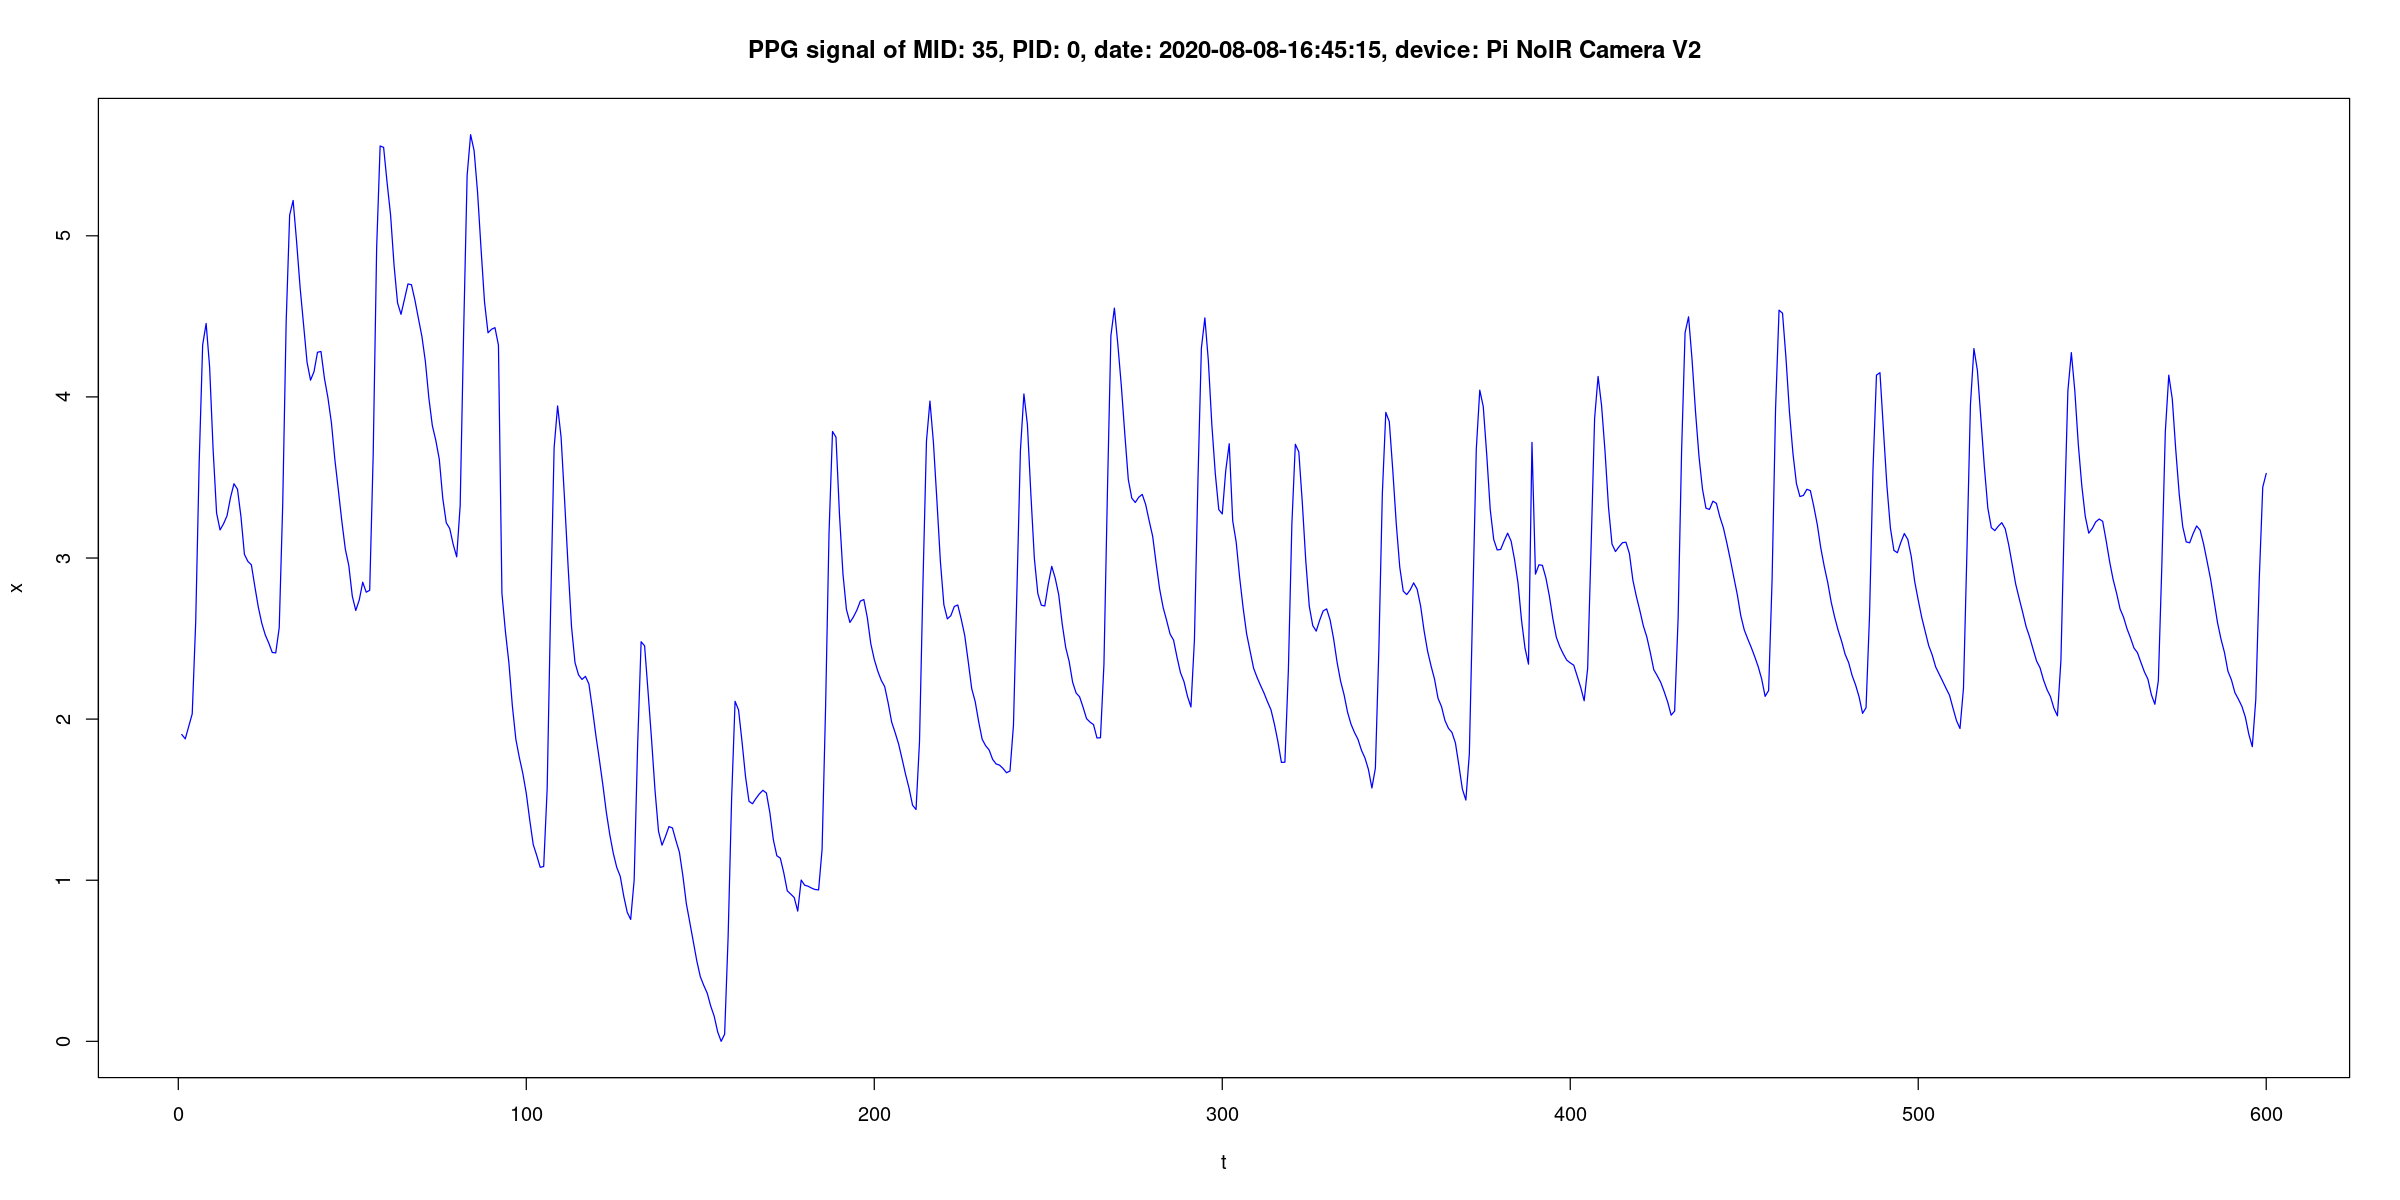

In [ ]:
mid <- 35
plot.measurement(df, mid)

In [ ]:
m <- get.measurement(df, mid)
x <- m$x

In [ ]:
l.frame <- 100 # time span = l.frame/10 sec, since we have 10 samples/sec
n <- length(x)
q <- n %/% l.frame
x <- x[1:(q*100)] # drop the reminder dividing with 500
# x  <- get.x.from.frames(frames.list)
# plot.ppg(x, main=paste('PPG signal of ', 'MID: ', mid, sep=''))
# print(length(x))

In [ ]:
frames.list <- list()
for (j in 0: ((q-1)*2) ) {
    start <- j*50 + 1
    # tester: 
    #cat(start, " : ", (start + 99), "\n")
    frames.list[[j+1]] <- x[start:(start + 99)]
}
n.of.frames = length(frames.list)

In [ ]:
is.signal = matrix(0, ncol=n.of.frames, nrow=1)
colnames(is.signal) <- sapply(1:n.of.frames, function(n.frame) get.time.of.frame(n.frame))
is.signal[1] <- 0.5
is.signal[2] <- 0.5
is.signal[6] <- 0.1
is.signal[8] <- 0.5
is.signal

1:100,51:150,101:200,151:250,201:300,251:350,301:400,351:450,401:500,451:550,501:600
0.5,0.5,0,0,0,0.1,0,0.5,0,0,0


In [ ]:
threshold  <- 0.4
parts  <- is.signal > threshold

In [ ]:
parts <- colnames(parts)[parts]

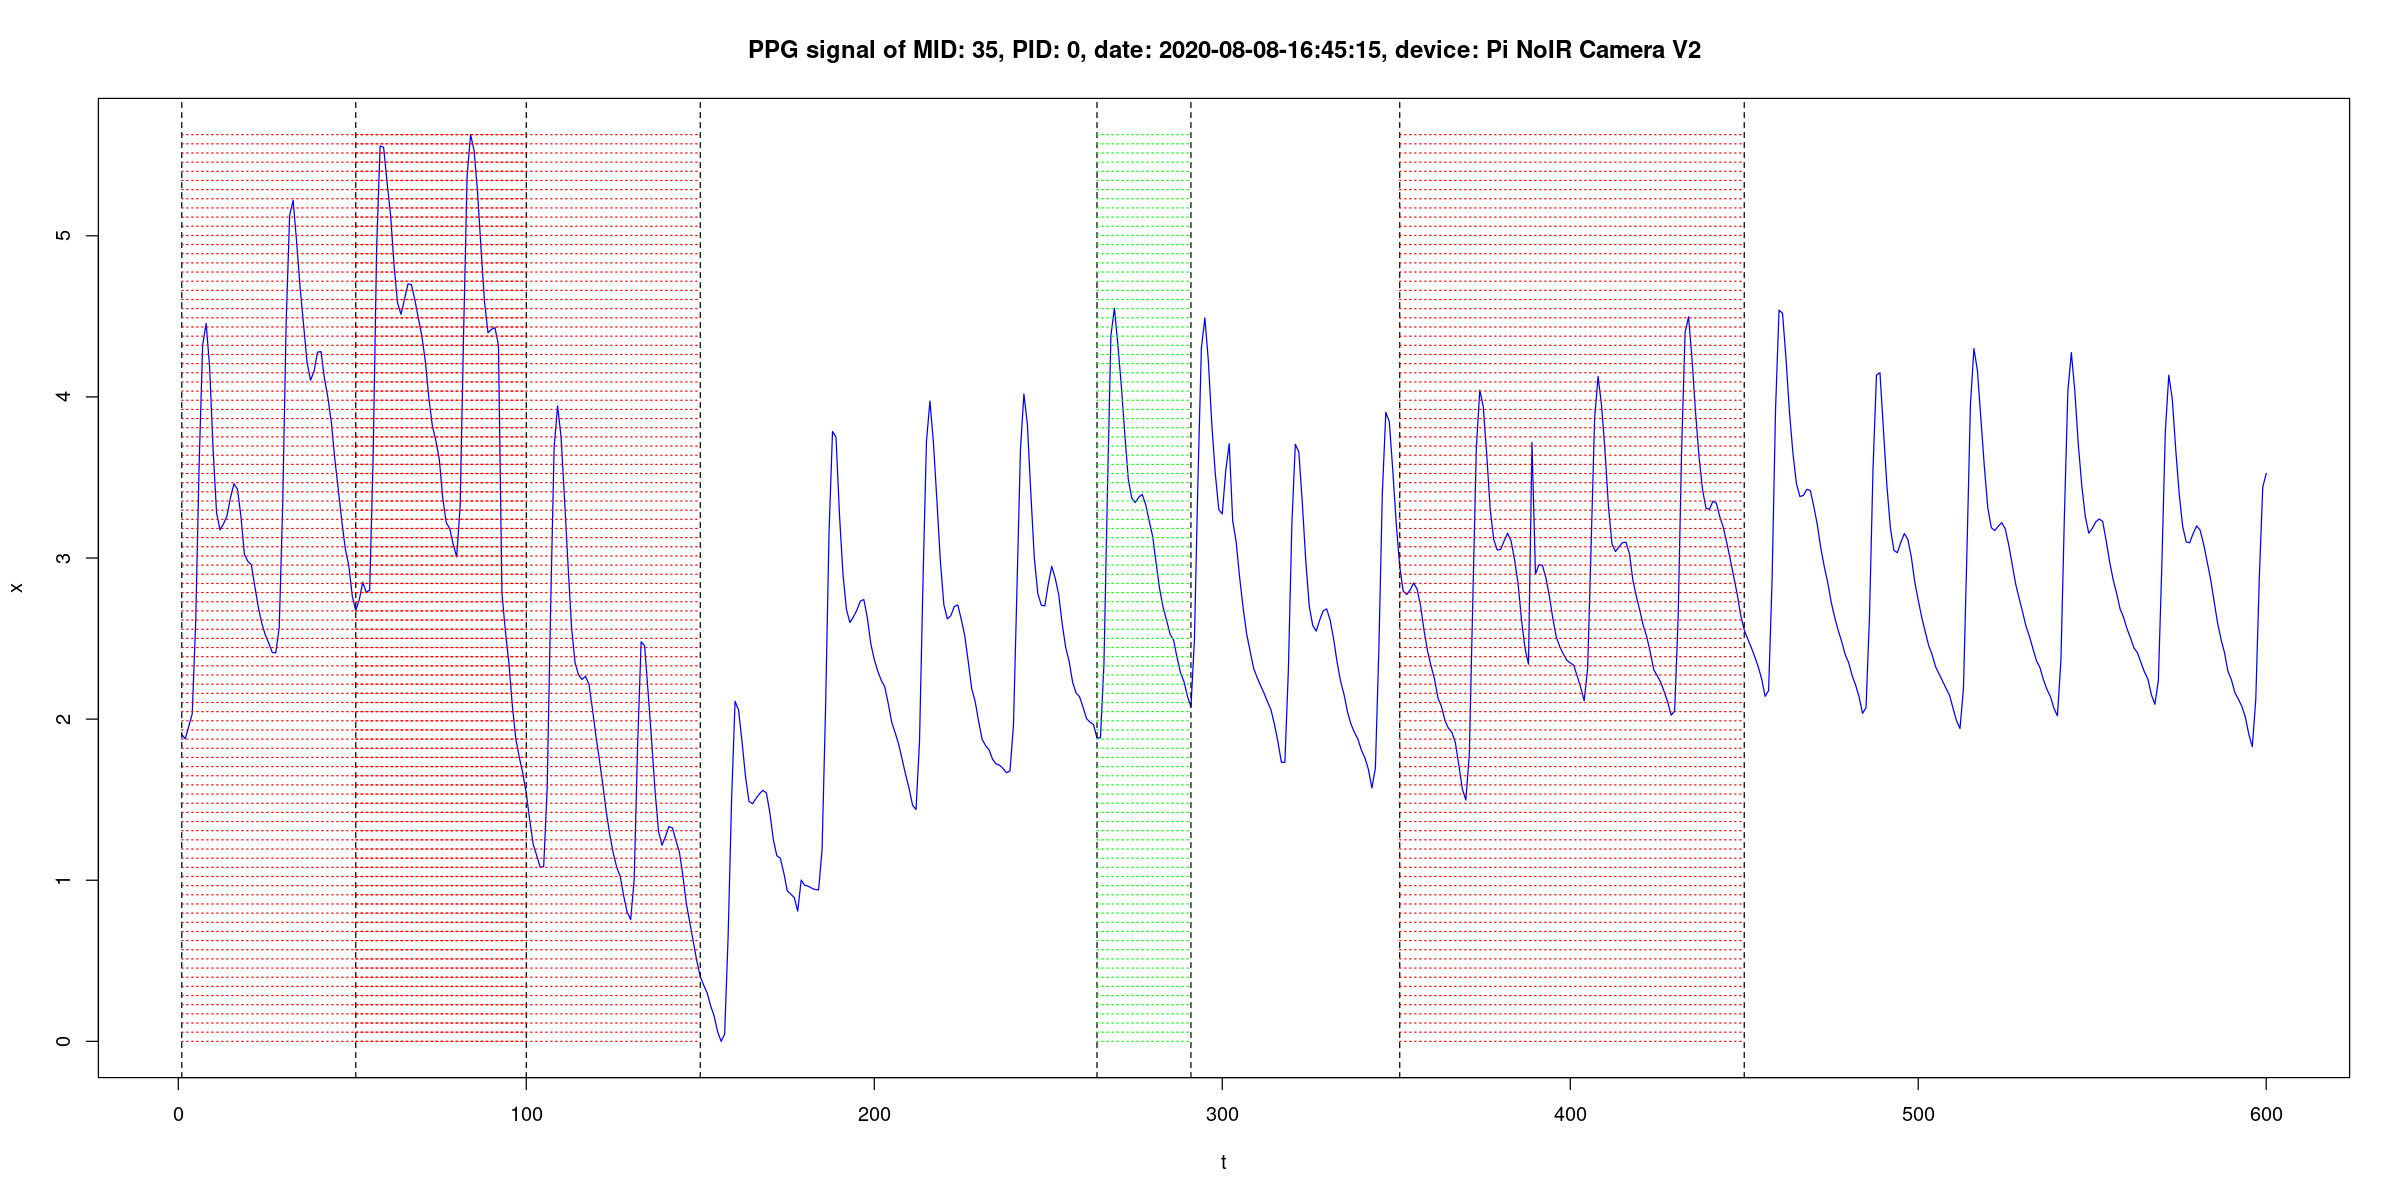

In [ ]:
x  <- get.x.from.frames(frames.list)
plot.measurement(df, mid)

# color frames  
plot.color <- 'red'
for (part in parts) {
    b1 <- strsplit(part, ":")[[1]][[1]]
    b2 <- strsplit(part, ":")[[1]][[2]]
    abline(v = b1,lty=2)
    abline(v = b2,lty=2)
    heights <- seq(min(flipud(x)), max(flipud(x)), length.out = 100)
    for (h in heights) {
        lines(c(b1, b2), c(h, h), lty=3, col=plot.color)
    }
}

# color peak
part  <- '264:291'
plot.color  <- 'green'
b1 <- strsplit(part, ":")[[1]][[1]]
b2 <- strsplit(part, ":")[[1]][[2]]
abline(v = b1,lty=2)
abline(v = b2,lty=2)
heights <- seq(min(flipud(x)), max(flipud(x)), length.out = 100)
for (h in heights) {
    lines(c(b1, b2), c(h, h), lty=3, col=plot.color)
}